In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import re
from itertools import groupby

In [2]:
X, Y = 'ATCGTAGCTACGTACGTUA', 'ATGCGATCGTGCTAC'
X, Y = np.array(list(X)), np.array(list(Y))

# print(X, '\n\n',Y)
# print(len(X), len(Y))



In [3]:
def new_matrix(X, Y):
    matrix = np.zeros((len(Y)+1, len(X)+1), dtype=object)
    # print(matrix.shape)
    # print(matrix)
    return matrix

In [16]:
def plot_matrix(matrix):
    plt.spy(matrix)
    plt.xticks(np.arange(len(X)), X)
    plt.yticks(np.arange(len(Y)), Y)
    plt.show()

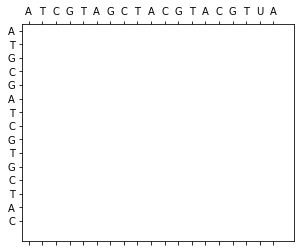

In [17]:
matrix = new_matrix(X, Y)
plot_matrix(matrix)


HHH

 0 3
0 3
SEQ1 ['A' 'T' 'C'] SEQ2 ['A' 'T' 'G']
A 0 A 0
T 1 T 1
MATCHED SEQUENCE ::  [1 1 0]


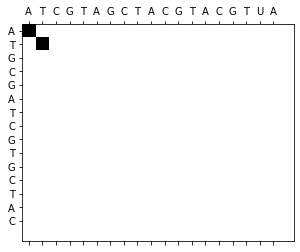


match

3 6
SEQ1 ['A' 'T' 'C'] SEQ2 ['C' 'G' 'A']
MATCHED SEQUENCE ::  [0 0 0]


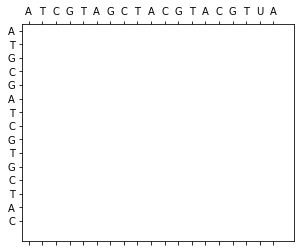

6 9
SEQ1 ['A' 'T' 'C'] SEQ2 ['T' 'C' 'G']
MATCHED SEQUENCE ::  [0 0 0]


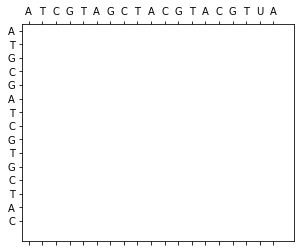

9 12
SEQ1 ['A' 'T' 'C'] SEQ2 ['T' 'G' 'C']
C 2 C 11
MATCHED SEQUENCE ::  [0 0 1]


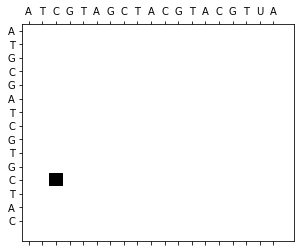

12 15
SEQ1 ['A' 'T' 'C'] SEQ2 ['T' 'A' 'C']
C 2 C 14
MATCHED SEQUENCE ::  [0 0 1]


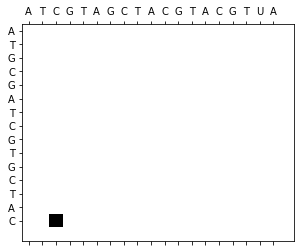


HHH

 3 6
0 3
SEQ1 ['G' 'T' 'A'] SEQ2 ['A' 'T' 'G']
T 4 T 1
MATCHED SEQUENCE ::  [0 1 0]


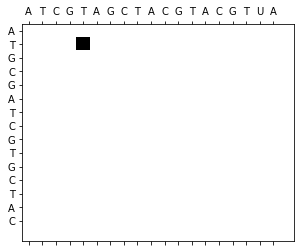

3 6
SEQ1 ['G' 'T' 'A'] SEQ2 ['C' 'G' 'A']
A 5 A 5
MATCHED SEQUENCE ::  [0 0 1]


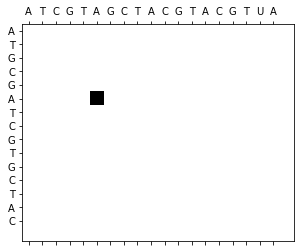

6 9
SEQ1 ['G' 'T' 'A'] SEQ2 ['T' 'C' 'G']
MATCHED SEQUENCE ::  [0 0 0]


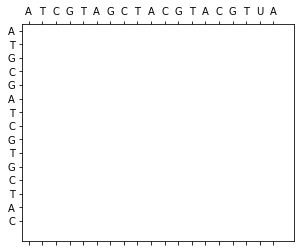

9 12
SEQ1 ['G' 'T' 'A'] SEQ2 ['T' 'G' 'C']
MATCHED SEQUENCE ::  [0 0 0]


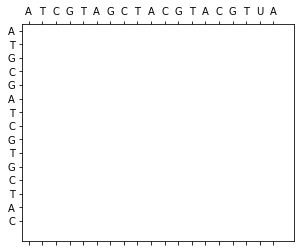

12 15
SEQ1 ['G' 'T' 'A'] SEQ2 ['T' 'A' 'C']
MATCHED SEQUENCE ::  [0 0 0]


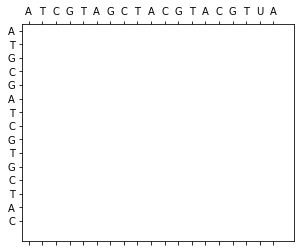


HHH

 6 9
0 3
SEQ1 ['G' 'C' 'T'] SEQ2 ['A' 'T' 'G']
MATCHED SEQUENCE ::  [0 0 0]


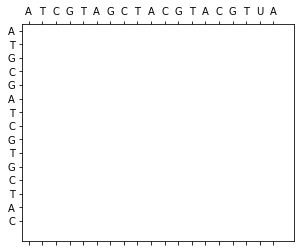

3 6
SEQ1 ['G' 'C' 'T'] SEQ2 ['C' 'G' 'A']
MATCHED SEQUENCE ::  [0 0 0]


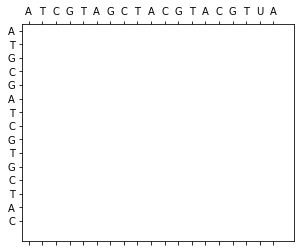

6 9
SEQ1 ['G' 'C' 'T'] SEQ2 ['T' 'C' 'G']
C 7 C 7
MATCHED SEQUENCE ::  [0 1 0]


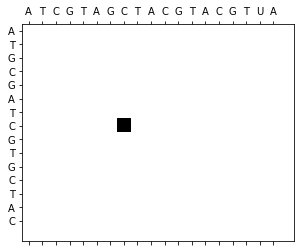

9 12
SEQ1 ['G' 'C' 'T'] SEQ2 ['T' 'G' 'C']
MATCHED SEQUENCE ::  [0 0 0]


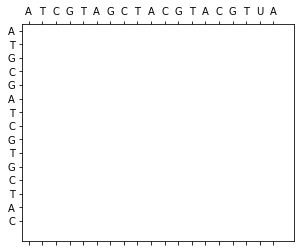

12 15
SEQ1 ['G' 'C' 'T'] SEQ2 ['T' 'A' 'C']
MATCHED SEQUENCE ::  [0 0 0]


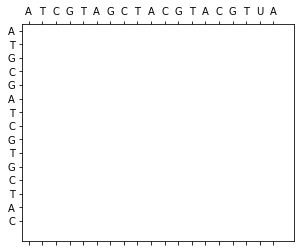


HHH

 9 12
0 3
SEQ1 ['A' 'C' 'G'] SEQ2 ['A' 'T' 'G']
A 9 A 0
G 11 G 2
MATCHED SEQUENCE ::  [1 0 1]


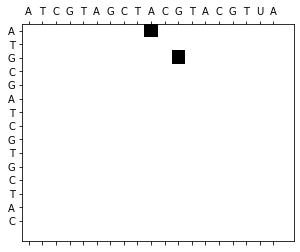

3 6
SEQ1 ['A' 'C' 'G'] SEQ2 ['C' 'G' 'A']
MATCHED SEQUENCE ::  [0 0 0]


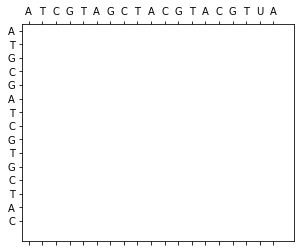

6 9
SEQ1 ['A' 'C' 'G'] SEQ2 ['T' 'C' 'G']
C 10 C 7
G 11 G 8
MATCHED SEQUENCE ::  [0 1 1]


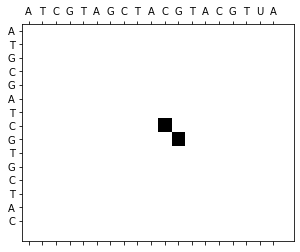


match

9 12
SEQ1 ['A' 'C' 'G'] SEQ2 ['T' 'G' 'C']
MATCHED SEQUENCE ::  [0 0 0]


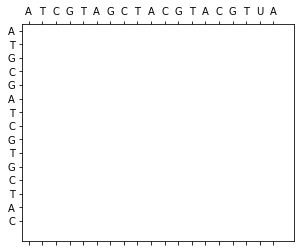

12 15
SEQ1 ['A' 'C' 'G'] SEQ2 ['T' 'A' 'C']
MATCHED SEQUENCE ::  [0 0 0]


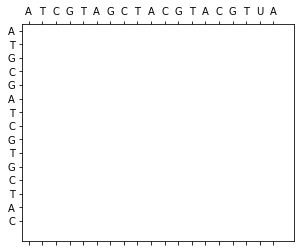


HHH

 12 15
0 3
SEQ1 ['T' 'A' 'C'] SEQ2 ['A' 'T' 'G']
MATCHED SEQUENCE ::  [0 0 0]


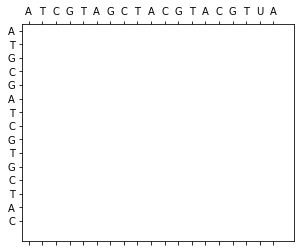

3 6
SEQ1 ['T' 'A' 'C'] SEQ2 ['C' 'G' 'A']
MATCHED SEQUENCE ::  [0 0 0]


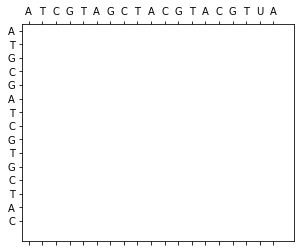

6 9
SEQ1 ['T' 'A' 'C'] SEQ2 ['T' 'C' 'G']
T 12 T 6
MATCHED SEQUENCE ::  [1 0 0]


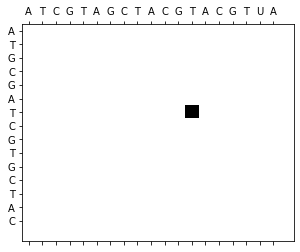

9 12
SEQ1 ['T' 'A' 'C'] SEQ2 ['T' 'G' 'C']
T 12 T 9
C 14 C 11
MATCHED SEQUENCE ::  [1 0 1]


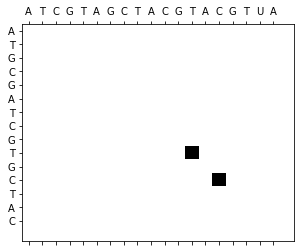

12 15
SEQ1 ['T' 'A' 'C'] SEQ2 ['T' 'A' 'C']
T 12 T 12
A 13 A 13
C 14 C 14
MATCHED SEQUENCE ::  [1 1 1]


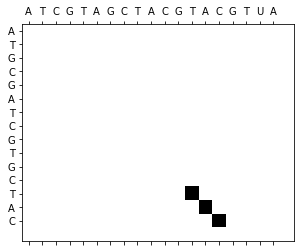


match


HHH

 15 18
0 3
SEQ1 ['G' 'T' 'U'] SEQ2 ['A' 'T' 'G']
T 16 T 1
MATCHED SEQUENCE ::  [0 1 0]


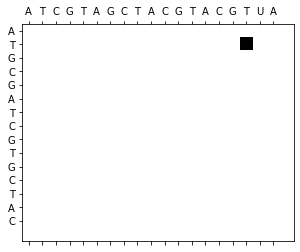

3 6
SEQ1 ['G' 'T' 'U'] SEQ2 ['C' 'G' 'A']
MATCHED SEQUENCE ::  [0 0 0]


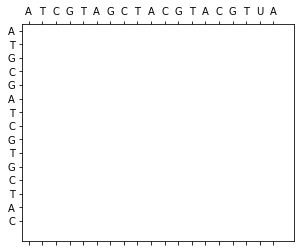

6 9
SEQ1 ['G' 'T' 'U'] SEQ2 ['T' 'C' 'G']
MATCHED SEQUENCE ::  [0 0 0]


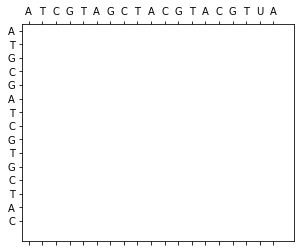

9 12
SEQ1 ['G' 'T' 'U'] SEQ2 ['T' 'G' 'C']
MATCHED SEQUENCE ::  [0 0 0]


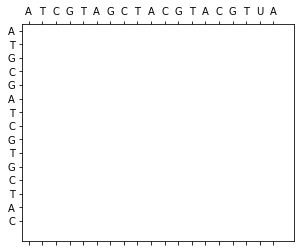

12 15
SEQ1 ['G' 'T' 'U'] SEQ2 ['T' 'A' 'C']
MATCHED SEQUENCE ::  [0 0 0]


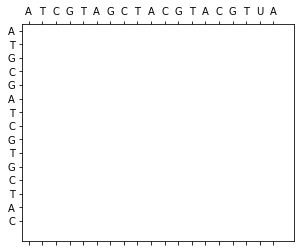

In [19]:
window = 3
threshold = 2

for i in range(0, len(X), window):
    
    if i+window <= len(X):
        print('\nHHH\n\n',i, i+window)
        seq1 = X[i:i+window]
    else:
        continue
    
    
    for j in range(0, len(Y), window):
        
        if j+window <= len(Y):
            print(j, j+window)
            seq2 = Y[j:j+window]
            print('SEQ1',seq1,'SEQ2',seq2)
        else:
            continue
        
        
        seq3 = np.zeros((window), dtype=int)
        m = new_matrix(X,Y)
        
        for k in range(window):
            if(seq1[k] == seq2[k]):
                seq3[k] = 1
                print(seq1[k],i+k, seq2[k], j+k)
                m[j+k][i+k] = 1
                
        
        
        #this is the matched sequence
        print('MATCHED SEQUENCE :: ', seq3)
        
        plot_matrix(m)
        
        g = groupby(seq3, key=lambda x:x>0)
        m = max([list(s) for v, s in g if v > 0.0], key=len, default=0)
        m = np.array(m)
        if(m.size >= threshold):
            print('\nmatch\n')
                 
        
       
        
        
        """
        plt.imshow(X==Y[:,None])        # the magic happens here, contourf should work similarly
        plt.xticks(np.arange(len(X)), X[i:i+window])
        plt.yticks(np.arange(len(Y)), Y[j:j+window])
        plt.show()
        """